# Trees and Random Forest

The fourth assignment will takle the classification problem by using two non-parametric methods: **trees** and **random forest**. The latter is a generalization of the former. 
These methods can be applied when we have a lot of predictors in order to divide the sample of data into groups with similar values. They are called *non-parametic* methods because they do not estimate any parameters, i.e. $\beta$s to shape the relationship between the X and the Y. In order to predict the outcome they split the sample based on some statistics (i.e. mean, median, etc...) referred to one or more features (Xs) in order to minimize the impurity of the sample split. These methods are applied to both the regression and the classification problem but they have had more applications and success in the *classification* framework.

We will see them applied to the **classification** problem.

The dataset uses a target variable with only 2 possible values: 0 or 1, and it is no longer a continuous output. The dataset if about a marketing campaign run by a Bank in order to persuade people to open a deposit account. The target variable called **deposit** is equal to 1 if after the marketing campaign the individual has opened a deposit account and 0 otherwise. In the dataset there are multiple vairables related to the individuals like: age, job, marital status, contact, etc...

So far we have seen only parametric methods, the logistic regression and its penalized version, today we will use non parametrics method.

The dataset is not "ready-to-go", hence before fitting the models you will need to manipulate the data in order to clean them. Moreover, there are some initial steps in order to include dummy vairables and non-linear predictors which you have already seen in the previous assignmemnt.

Each group has to do the following: 

1. From sklearn.metrics import the following metrics to evaluate the models: accuracy score, roc_auc_score,confusion_matrix, classification report, roc_curve and precision_score
2. From sklearn import the packages needed to perform: Logist Regression, GridSearchCV, train test split and from the tree and ensemble method you need to import the DecisionTreeClassifier and the RandomForestClassifier.
3. Drop the variables: 'day' and 'poutcome'.
4. Convert all the 'object' variables into dumy using the command **.get_dummies()** proper of the pandas DataFrame Structure, and include them to the original dataset.
5. Split the data into train and test sample.
6. **Do not drop any dummy variable**, use all of them to fit the model. Since we are deaing with the Decision Tree and the Random Forest do we need to standardize the variables? If yes, why?


7. Fit the simple Logistic Regression using the training data. Using the test sample produce the predictions, and evaluate the model using average acucracy, roc aur score.
8. Produce the confusione matrix and the classification report for the simple Logistic regression. The simple Logistic Regression will be used as baseline model.


9. Fit the decision Tree Classifier using as hyperparameters to calibrate: **max_depth** and **min_samples_split**. For max_depth try at least 5 values from 2 to 20 and for min_sample_split try at least 10 values from 2 to 20. Which are the best value for the max_depth and min_samples_split from the cross-validation?
10. Using the test sample produce the predictions, and evaluate the model using average acucracy, roc aur score.
11. Produce the confusione matrix and the classification report for the Decision Tree Classifier.


12. Fit the decision Random Forest Classifier using as hyperparameters to calibrate: **n_estimators**, **max_depth** and **min_samples_split**. For n_estimators use at elast 4 values minimum 50 and maximum 250, for max_depth try at least 4 values from 2 to 14 and for min_sample_split try at least 5 values from 2 to 20. Which are the best value for n_estimators, max_depth and min_samples_split from the cross-validation?
13. Using the test sample produce the predictions, and evaluate the model using average acucracy, roc aur score.
14. Produce the confusione matrix and the classification report for the Random Forest Classifier.


15.  Which is the best model in terms of accuracy? In temrs of precision? Why for you is that the case?

16. Using the best value for the hyperparameters determined in the cross-validation re-fit the Decision Tree Classifier and the Random Forest Classifier.
17. Once you have re-fit both models create a DataFrame that contains the \text{feature_importances_}, one for each model.
18. Make the barplot with the top 10 features for each model. Are they similar? If not, what are the main differences?




In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix, classification_report, roc_curve, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## load all the other packages, class or function in order to complete the assignment.

In [ ]:
# import the data using pandas
mrk_data = pd.read_csv("../Data/BankMarketing.csv", header = 0, sep=",")

# Display the first 5 rows and 10 colums of the dataset.
mrk_data.head()

# Changing "deposit" to binary values
mrk_data.loc[mrk_data["deposit"] =="yes", "deposit"] = 1
mrk_data.loc[mrk_data["deposit"] =="no", "deposit"] = 0
mrk_data["deposit"] = mrk_data["deposit"].astype('bool')


#3. Drop variables, separating exogenous and endogenous variables
mrk_data_y=mrk_data["deposit"]
mrk_data_x=mrk_data.drop(columns=["day", "poutcome","deposit"])

#4 Adding Dummies
mrk_data_x= pd.get_dummies(mrk_data_x, drop_first=True)


#5 Split Data into Train and Test
X_training, X_test, Y_train, Y_test = train_test_split(mrk_data_x,mrk_data_y,test_size=0.2, random_state=3)


#6 Standardization of Decision Tree and Random Forest
#We do not need to standardize variables for DT and RF. Regions in the decision are not affected
#by the scale of the variable. In a linear or logistic model, relation between endogenous and 
#exogenous variable must be standardize into a linear relation for the model to correctly capture
#it. This is not the case in decision tree where regions can be split in any size. For example,
#if we want to modelize a logarithmic relation, we would have to linearize the x variable before
#fitting a linear model. For the decision tree, we could just split regions accordingly (for example
#region1 goes from 1 to 10, region2 goes from 10 to 100, region3 goes from 100 to 1000,...).

#7 Logistic Regression, accuracy score and roc auc score
mrk_data_LR=LogisticRegression(random_state=0).fit(X_training, Y_train)
Y_log_predict=mrk_data_LR.predict(X_test)

acc_score_lr = accuracy_score(Y_test, Y_log_predict)
rocauc_lr = roc_auc_score(Y_test, Y_log_predict)

print('Accuracy score: ', round(acc_score_lr,3))
print('Roc auc score: ', round(rocauc_lr,3))

#8 Confusion matrix and the classification report
class_rep_lr=classification_report(Y_test, Y_log_predict)
print(class_rep_lr)

# Confusion matrix
conf_mat_lr = confusion_matrix(Y_test, Y_log_predict)
print(conf_mat_lr)


Accuracy score:  0.807
Roc auc score:  0.806
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1199
        True       0.79      0.80      0.79      1034

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

[[979 220]
 [211 823]]


In [ ]:
#9. Decision Tree

mrk_DTR = DecisionTreeClassifier()
parameters={'max_depth':range(2,20,4),'min_samples_split':range(2,21,2)}
cv_DTR=GridSearchCV(mrk_DTR, parameters, cv=10)
cv_DTR.fit(X_training, Y_train)
mrk_tree_model=cv_DTR.best_estimator_
print(math.sqrt(cv_DTR.best_score_), cv_DTR.best_params_)

#10. Predictions, Acucracy, Roc Aur score.
y_tree_predict=mrk_tree_model.predict(X_test)

acc_score_tree = accuracy_score(Y_test, y_tree_predict)
rocauc_tree = roc_auc_score(Y_test, y_tree_predict)

print('Accuracy score: ', round(acc_score_tree,3))
print('Roc auc score: ', round(rocauc_tree,3))

#11 Confusion matrix and the classification report
class_rep_tree=classification_report(Y_test, y_tree_predict)
print(class_rep_tree)

# Confusion matrix
conf_mat_tree = confusion_matrix(Y_test, y_tree_predict)
print(conf_mat_tree)

0.9077756821188507 {'max_depth': 10, 'min_samples_split': 18}
Accuracy score:  0.82
Roc auc score:  0.821
              precision    recall  f1-score   support

       False       0.84      0.82      0.83      1199
        True       0.79      0.83      0.81      1034

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233

[[978 221]
 [180 854]]


In [ ]:
# 12 Random Forest 

mrk_RF = RandomForestClassifier()
parameters={'max_depth':range(2,14,3),'min_samples_split':range(2,21,2),'n_estimators':range(50,250,50)}
cv_RF=GridSearchCV(mrk_RF, parameters, cv=10)
cv_RF.fit(X_training, Y_train)
mrk_forest_model=cv_RF.best_estimator_
print(math.sqrt(cv_RF.best_score_), cv_RF.best_params_)

#13. Predictions, Acucracy, Roc Aur score.
y_forest_predict=mrk_forest_model.predict(X_test)

acc_score_forest = accuracy_score(Y_test, y_forest_predict)
rocauc_forest = roc_auc_score(Y_test, y_forest_predict)

print('Accuracy score: ', round(acc_score_forest,3))
print('Roc auc score: ', round(rocauc_forest,3))

#14 Confusion matrix and the classification report
class_rep_forest=classification_report(Y_test, y_forest_predict)
print(class_rep_forest)

# Confusion matrix
conf_mat_forest = confusion_matrix(Y_test, y_forest_predict)
print(conf_mat_forest)

0.9182633109970865 {'max_depth': 11, 'min_samples_split': 4, 'n_estimators': 150}
Accuracy score:  0.837
Roc auc score:  0.84
              precision    recall  f1-score   support

       False       0.89      0.80      0.84      1199
        True       0.79      0.88      0.83      1034

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233

[[957 242]
 [122 912]]


#15 Which is the best model in terms of accuracy? In terms of precision? Why for you is that the case? Both in term of accuracy and precision, the best model is the random forest, followed by the decision tree and the worst is the logistic regression. The prediction scores are 0.88 for the random forest, 85 for the decision tree, while it is 0.82 for the logistic regression. The accuracy scores are respectively 0.83, 0.82 and 0.81. The reason why the random forest is better than the decision tree model is that a random forest combines multiple decision tree, the prediction of a random forest is based on a majority rules from its multiple decision trees. This makes it more precise and
accurate than the simple decision tree. 

In [ ]:
#16 Using the best value for the hyperparameters determined in the cross-validation 
#re-fit the Decision Tree Classifier and the Random Forest Classifier.

#We have already fitted the Decision Tree Classifier and the Random Forest Classifier in 
#previous sections.The Decision Tree Classifier is called mrk_tree_model and the Random
#Forest Classifier is called mrk_forest_model

#17 Once you have re-fit both models create a DataFrame that contains the 
#\text{featureimportances}, one for each model.
column_x = pd.DataFrame(X_training.columns)
imp_feat_tree=pd.concat([column_x,pd.DataFrame(mrk_tree_model.feature_importances_)],axis=1)
imp_feat_forest=pd.concat([column_x,pd.DataFrame(mrk_forest_model.feature_importances_)],axis=1)



#18 

The two most important parameters were the same: duration, recent_pdays. Those two parameters represent more than 50% of the importance for both models. The remaining parameters are similar but do not have the same weight.



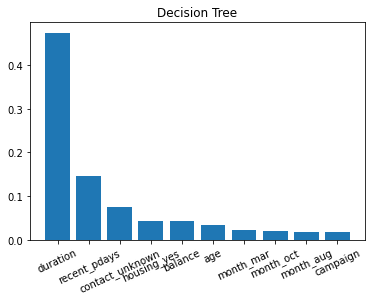

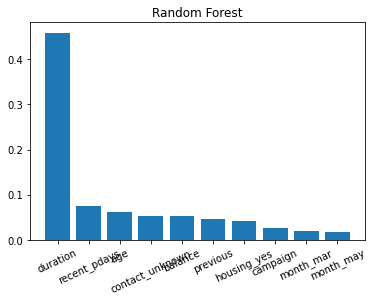

In [ ]:
#18 Plot bar
#Adding columns for easier data manipulation
imp_feat_tree.columns= ['Parameter Name','Importance']
imp_feat_forest.columns= ['Parameter Name','Importance']

#Sorting value by importance
sortedvalue_tree=imp_feat_tree.sort_values(by=imp_feat_tree.columns[1],ascending=False)
sortedvalue_forest=imp_feat_forest.sort_values(by=imp_feat_forest.columns[1],ascending=False)

#Getting the 10 most important
imp_tree_10=sortedvalue_tree[0:10]
imp_forest_10=sortedvalue_forest[0:10]

plt.clf()
plt.bar(imp_tree_10.iloc[:,0],imp_tree_10.iloc[:,1])
plt.xticks(rotation=25)
plt.title("Decision Tree")
plt.show()

plt.clf()
plt.bar(imp_forest_10.iloc[:,0],imp_forest_10.iloc[:,1])
plt.xticks(rotation=25)
plt.title("Random Forest")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd5dab38-5e7c-42d3-9bd3-477a51125002' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>